## **Cause of death in Brazil, 2019-2020**

### **Source of data**

- The registry offices in Brazil decided to make available some data about the registered deaths in Brazil since the coronavirus pandemic.
- This data contain the number of registered deaths by day, state, gender, age, skin color and cause of death (mainly focused in covid-19 and cardiovascular diseases)[1] occurred between 01-01-2019 and 15-09-2020.
- Data is available at this [link](https://www.kaggle.com/datasets/amandalk/cause-of-death-in-brazil-20192020)

## Objective
- The objective of this project is to create a data analysis that will help us to understand the number and causes of deaths while comparing people of different states, age, color and gender.

### Import libraries

In [3]:

import pandas as pd
import numpy as np
#for statistcs
# import scipy.stats
# import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [4]:
df = pd.read_csv('Data.csv')
df_original = df.copy() # copy the original data frame

In [5]:
df.head()       # To see the first 5 rows of data set

,date,state,gender,age,color,cause,total
0,2020-01-01,AC,F,60 - 69,East asian,Septicemia,1
1,2019-01-01,AC,F,80 - 89,White,Hearth attack,1
2,2019-01-01,AC,F,30 - 39,Indigenous,Others,1
3,2019-01-01,AC,F,70 - 79,Mixed,Cardiogenic shock,1
4,2020-01-01,AC,F,70 - 79,Mixed,Pneumonia,1


## Check shape 

In [6]:
rows, cols = df.shape
print("Number of Rows are: ", rows)
print("Number of Columns are: ", cols)

Number of Rows are:  1098241
Number of Columns are:  7


- Check names of all the columns

In [7]:
df.columns

Index(['date', 'state', 'gender', 'age', 'color', 'cause', 'total'], dtype='object')

## Check info

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098241 entries, 0 to 1098240
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1098241 non-null  object
 1   state   1098241 non-null  object
 2   gender  1098241 non-null  object
 3   age     1098241 non-null  object
 4   color   1098241 non-null  object
 5   cause   1098241 non-null  object
 6   total   1098241 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 58.7+ MB


## Summary statistics

In [9]:
df.describe()

,total
count,1.098241e+06
mean,1.872415e+00
std,2.233376e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,4.300000e+01


**Observation:** 

Only "total" column was displayed in above `describe` function since it is the only numeric column in our data

## Find missing values

In [10]:
# Percent calculation
df.isnull().sum() / df.shape[0] * 100

date      0.0
state     0.0
gender    0.0
age       0.0
color     0.0
cause     0.0
total     0.0
dtype: float64

In [11]:
# check duplicates
df.duplicated().sum()

0

- There are no duplicates or  missing values in the data set but there are some N/I (Not identified) values in the age column.

In [12]:
df.age.groupby(df["age"]).count()

age
10 - 19     12295
20 - 29     29591
30 - 39     47786
40 - 49     80500
50 - 59    130321
60 - 69    180990
70 - 79    206773
80 - 89    201951
90 - 99    119868
< 9         52391
> 100       19649
N/I         16126
Name: age, dtype: int64

- Plotting histogram of age column

<AxesSubplot:xlabel='Count', ylabel='age'>

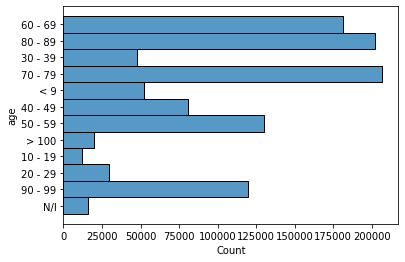

In [13]:
sns.histplot(y=df['age'])

- Removing the rows containing N/I values from the data set

In [14]:
df = df[df['age'] != 'N/I']

- Catplot 

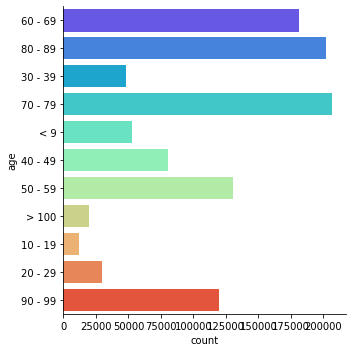

In [15]:
ax=sns.catplot(y="age", kind="count", palette="rainbow", data=df)


- Cat plot shows a large distribution of data which we can expect from a time-series dataset.

### Splitting a column into multiple columns

- Splitting date into year, month, day

In [16]:
df['date'].value_counts()

2020-05-11    2313
2020-05-12    2312
2020-05-30    2304
2020-05-09    2298
2020-06-08    2279
              ... 
2020-09-11    1141
2020-09-12    1055
2020-09-13     907
2020-09-14     467
2020-09-15      79
Name: date, Length: 624, dtype: int64

In [17]:
df[["year_of_death", "month_of_death", "day"]] = df["date"].str.split("-", expand = True)

- Dropping the unnecessary columns

In [18]:
df.drop(["date", "day"], axis = 1, inplace = True)
df.head()

,state,gender,age,color,cause,total,year_of_death,month_of_death
0,AC,F,60 - 69,East asian,Septicemia,1,2020,01
1,AC,F,80 - 89,White,Hearth attack,1,2019,01
2,AC,F,30 - 39,Indigenous,Others,1,2019,01
3,AC,F,70 - 79,Mixed,Cardiogenic shock,1,2019,01
4,AC,F,70 - 79,Mixed,Pneumonia,1,2020,01


## Check data type

In [19]:
df.dtypes

state             object
gender            object
age               object
color             object
cause             object
total              int64
year_of_death     object
month_of_death    object
dtype: object

## Type casting

- Converting data type of two columns year_of_death and month_of_death from object to int

In [20]:
df["year_of_death"] = df["year_of_death"].astype(int)
df["month_of_death"] = df["month_of_death"].astype(int)

### Converting string into numbers

- Converting gender M and F into 0 and 1 respectively and making a new column gender_in_number.

In [21]:
df["gender_in_number"] = df.gender.map({'M': 0, 'F': 1})
df.head()

,state,gender,age,color,cause,total,year_of_death,month_of_death,gender_in_number
0,AC,F,60 - 69,East asian,Septicemia,1,2020,1,1
1,AC,F,80 - 89,White,Hearth attack,1,2019,1,1
2,AC,F,30 - 39,Indigenous,Others,1,2019,1,1
3,AC,F,70 - 79,Mixed,Cardiogenic shock,1,2019,1,1
4,AC,F,70 - 79,Mixed,Pneumonia,1,2020,1,1


### Check columns on the basis of data type

In [22]:
df.dtypes

state               object
gender              object
age                 object
color               object
cause               object
total                int64
year_of_death        int32
month_of_death       int32
gender_in_number     int64
dtype: object

- select only object columns

In [23]:
df.select_dtypes(include=['object']).head() 

,state,gender,age,color,cause
0,AC,F,60 - 69,East asian,Septicemia
1,AC,F,80 - 89,White,Hearth attack
2,AC,F,30 - 39,Indigenous,Others
3,AC,F,70 - 79,Mixed,Cardiogenic shock
4,AC,F,70 - 79,Mixed,Pneumonia


- select only numeric columns

In [24]:
df.select_dtypes(include=['number']).head() 

,total,year_of_death,month_of_death,gender_in_number
0,1,2020,1,1
1,1,2019,1,1
2,1,2019,1,1
3,1,2019,1,1
4,1,2020,1,1


- Converting range of age into four categories; kids, teens, adults, old

In [25]:
df.age.groupby(df["age"]).count()

age
10 - 19     12295
20 - 29     29591
30 - 39     47786
40 - 49     80500
50 - 59    130321
60 - 69    180990
70 - 79    206773
80 - 89    201951
90 - 99    119868
< 9         52391
> 100       19649
Name: age, dtype: int64

In [26]:
df['age'] = df['age'].replace([ "< 9", '10 - 19','20 - 29', "30 - 39","40 - 49", '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99', "> 100"], ["kids",'teens','adults', "adults", "old", "old", 'old', 'old', 'old', 'old', 'old'])
df['age']

0             old
1             old
2          adults
3             old
4             old
            ...  
1098236       old
1098237    adults
1098238       old
1098239       old
1098240       old
Name: age, Length: 1082115, dtype: object

In [27]:
df.age.groupby(df["age"]).count()

age
adults     77377
kids       52391
old       940052
teens      12295
Name: age, dtype: int64

## Checking unique values:

In [28]:
df.color.unique()

array(['East asian', 'White', 'Indigenous', 'Mixed', 'Ignored', 'Black'],
      dtype=object)

In [29]:
df.cause.unique()

array(['Septicemia', 'Hearth attack', 'Others', 'Cardiogenic shock',
       'Pneumonia', 'Stroke', 'Undetermined', 'Respiratory failure',
       'Cardiopathy', 'Sudden death', 'Sars', 'Covid', 'Covid (stroke)',
       'Covid (hearth attack)', 'Unknown'], dtype=object)

## Checking value counts in each column

In [30]:
df.age.value_counts()

old       940052
adults     77377
kids       52391
teens      12295
Name: age, dtype: int64

In [31]:
df.color.value_counts()

White         412886
Mixed         386444
Ignored       164586
Black          98453
East asian     16067
Indigenous      3679
Name: color, dtype: int64

## Checking outliers

<AxesSubplot:xlabel='month_of_death', ylabel='Count'>

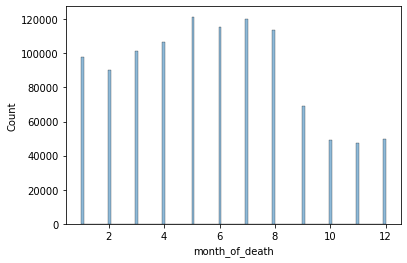

In [32]:
sns.histplot(df['month_of_death'],  alpha = 0.5, label = 'year_of_death')

c:\Users\sunrise\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total'>

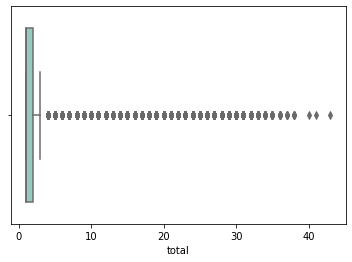

In [33]:
sns.boxplot(df['total'],data=df, palette="Set3")

- The total column has outliers but it is completely justified. As it tells us about the number of deaths in a particular area based on the people's age, gender and color due to disease. As there can be a lot more deaths in one area due to widespread of some virus in that area, so these are not considered as wrong values.

# Filtering data

### Percentage comparison of data of males and females

<AxesSubplot:ylabel='None'>

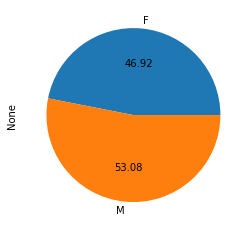

In [34]:
df.groupby('gender').size().plot(kind='pie', autopct='%.2f')

### Top 8 causes of death

In [35]:
big_causes = df.cause.value_counts().nlargest(9)
big_causes

Others                 298788
Pneumonia              147573
Septicemia             140035
Stroke                 107580
Hearth attack           97194
Respiratory failure     93594
Cardiopathy             45682
Cardiogenic shock       45150
Covid                   42130
Name: cause, dtype: int64

([<matplotlib.patches.Wedge at 0x148553ce650>,
 [Text(0.6643690267504537, 0.8767062200615752, 'Others'),
  Text(-0.8663348406368507, 0.9692594822330718, 'Pneumonia'),
  Text(-1.0988161480847216, -0.05102031662245165, 'Septicemia'),
  Text(-0.7578463681824564, -0.7972884561014669, 'Stroke'),
  Text(-0.14033883817818713, -1.0910110038394647, 'Hearth attack'),
  Text(0.4893374279836178, -0.9851643931722146, 'Respiratory failure'),
  Text(0.8554271403645529, -0.6915521726722603, 'Cardiopathy'),
  Text(1.013392898373479, -0.4278257046113523, 'Cardiogenic shock'),
  Text(1.0907109368379764, -0.14265220735068893, 'Covid ')],
 [Text(0.3623831055002475, 0.4782033927608591, '29.4%'),
  Text(-0.5331291326996004, 0.5964673736818903, '14.5%'),
  Text(-0.5993542625916662, -0.027829263612246354, '13.8%'),
  Text(-0.4133707462813398, -0.43488461241898196, '10.6%'),
  Text(-0.07654845718810206, -0.5950969111851625, '9.6%'),
  Text(0.26691132435470055, -0.5373623962757533, '9.2%'),
  Text(0.466596622017

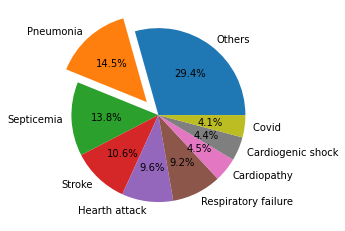

In [36]:
label = ["Others","Pneumonia","Septicemia","Stroke","Hearth attack", "Respiratory failure", "Cardiopathy", "Cardiogenic shock", "Covid "]
# pie chart
plt.pie(big_causes, labels=label, autopct='%1.1f%%', explode=(0,0.2,0,0,0,0,0,0,0))

### Top 5 states with most number of deaths

In [37]:
df.groupby('state').total.sum().sort_values(ascending=False).head(5)

state
SP    534452
RJ    248359
MG    204563
RS    141342
BA    110401
Name: total, dtype: int64

### Which year has the highest number of deaths (grouping by age)?

<AxesSubplot:xlabel='year_of_death', ylabel='total'>

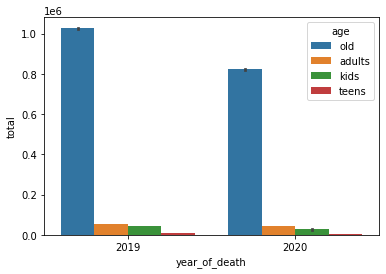

In [38]:
sns.barplot(x="year_of_death", y="total", data=df, hue="age" ,estimator=np.sum)

### No. of deaths depending on gender:

<AxesSubplot:xlabel='total', ylabel='gender'>

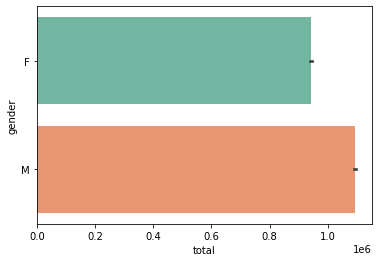

In [39]:
sns.barplot(x='total', y='gender', data=df, palette="Set2", estimator=np.sum)

### Stripplot of months of death based on age

<AxesSubplot:xlabel='age', ylabel='month_of_death'>

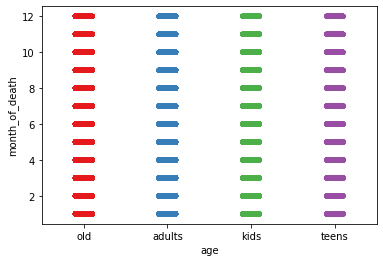

In [40]:
sns.stripplot(x='age', y='month_of_death', data=df, palette="Set1")

### Scatter plot of total deaths based on skin color

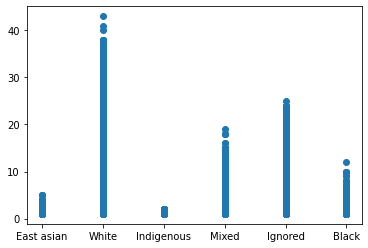

In [41]:
plt.scatter(df['color'], df['total'])

<AxesSubplot:xlabel='color', ylabel='total'>

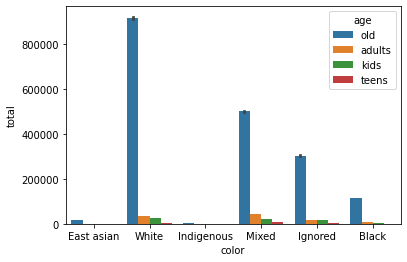

In [43]:
df.groupby('color').total.sum().sort_values(ascending=False).head(5)
sns.barplot(x="color", y="total", data=df, hue="age" ,estimator=np.sum)

![Pictue](3.png)

### Correlation

- As there was only one numeric column in the data set so Correlation does not make any sense.

### Heat map

<AxesSubplot:>

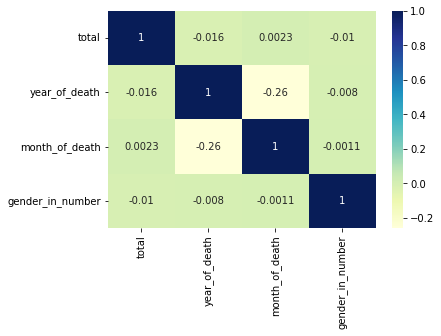

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

**We have compared the number and causes of deaths based on age, gender, state and color of people.**